In [1]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pylab as plt

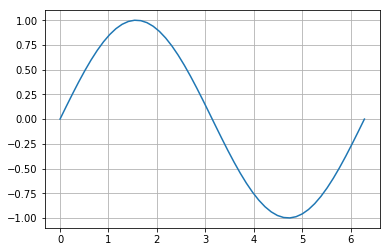

In [6]:
x = np.linspace(0, 2*np.pi)
plt.plot(x, np.sin(x))
plt.grid(True)

In [19]:
def EuroBin(S, K, T, rf, sigma, N, PC):
    import numpy as np
    from scipy.special import comb
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(rf*dt) - d) / (u - d)
    EuroBinPrice = 0.0
    for i in range(N):
        if PC == 'C':
            EuroBinPrice = EuroBinPrice + comb(N, i, exact=False)* (p**i) * (1-p)**(N-i) * max(S*u**i*d**(N-i)-K, 0)
        elif PC == 'P':
            EuroBinPrice = EuroBinPrice + comb(N, i, exact=False)* (p**i) * (1-p)**(N-i) * max(K-S*u**i*d**(N-i), 0)
    EuroBinPrice *= np.exp(-rf*T)
    return EuroBinPrice

In [20]:
print(EuroBin(30, 30, 0.4167, 0.05, 0.3, 20, 'P'))

1.9655729209946713


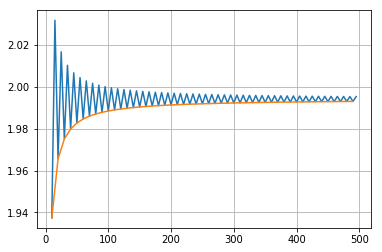

In [44]:
N = range(10, 500, 5)
p = np.zeros_like(N, 'd')
for i,n in enumerate(N):
    p[i] = EuroBin(30, 30, 0.4167, 0.05, 0.3, n, 'P')
    #print(i, n, p[i])
plt.plot(N, p, '-')
plt.plot(N[::2], p[::2], '-')
plt.grid(True)

In [72]:
def Binomial(Spot, K, T, r, sigma, N, PC, EuroAmer = "Amer", Dividends = None):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r*dt) - d) / (u-d)
    S = np.zeros((N+1, N+1), 'd')
    S[0,0] = Spot
    for i in range(N+1):
        for j in range(i, N+1):
            S[i,j] = S[0,0] * u**(j-i) * d**i
    #print(S)
    Opt = np.zeros((N+1, N+1), 'd')
    for i in range(N+1):
        if PC == 'C':
            Opt[i,N] = max(S[i,N] - K, 0)
        elif PC == 'P':
            Opt[i,N] = max(K - S[i,N], 0)
    
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            if EuroAmer == "Amer":
                if PC == 'C':
                    Opt[i,j] = max(S[i,j] - K, np.exp(-r*dt)*(p*Opt[i,j+1] + (1-p)*Opt[i+1,j+1]))
                elif PC == 'P':
                    Opt[i,j] = max(K - S[i,j], np.exp(-r*dt)*(p*Opt[i,j+1] + (1-p)*Opt[i+1,j+1]))
            elif EuroAmer == "Euro":
                Opt[i,j] = np.exp(-r*dt)*(p*Opt[i,j+1] + (1-p)*Opt[i+1,j+1])
    # print(Opt)
    return Opt[0,0]

In [76]:
print("Ameri", Binomial(30, 30, 0.4167, 0.05, 0.3, 100, 'P'))
print("Euro", Binomial(30, 30, 0.4167, 0.05, 0.3, 100, 'P', 'Euro'))

Ameri 2.0462400157269554
Euro 1.9884210563880225


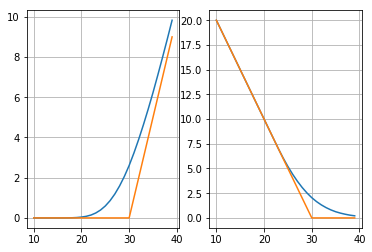

In [86]:
S = range(10, 40)
OptC = [Binomial(s, 30, 0.4167, 0.05, 0.3, 100, 'C') for s in S]
Opt0 = [max(s-30, 0) for s in S]
OptP = [Binomial(s, 30, 0.4167, 0.05, 0.3, 100, 'P') for s in S]
Opt1 = [max(30-s, 0) for s in S]
plt.subplot(1,2,1)
plt.plot(S, OptC, '-')
plt.plot(S, Opt0, '-')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(S, OptP, '-')
plt.plot(S, Opt1, '-')
plt.grid(True)

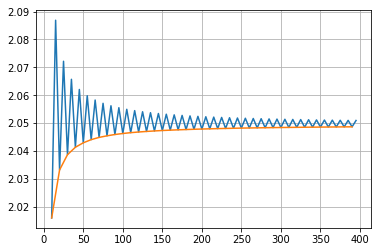

In [88]:
N = range(10, 400, 5)
p = [ Binomial(30, 30, 0.4167, 0.05, 0.3, n, 'P') for n in N]

plt.plot(N, p, '-')
plt.plot(N[::2], p[::2], '-')
plt.grid(True)
